In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##****Importing the Dataset****

In [22]:
train = pd.read_csv('train.csv')

In [23]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


#****EDA****

In [24]:
train.shape

(750000, 12)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [26]:
train.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [27]:
train.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [30]:
train.dropna(inplace = True)

In [31]:
train.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [32]:
train.duplicated().sum()

np.int64(0)

In [33]:
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,539048.000000,539048.000000,539048.000000,539048.000000,539048.000000,539048.000000
mean,375144.243800,64.556952,59.728964,52.234021,1.324945,45.811258
std,216466.180115,32.891153,22.844111,28.510395,1.155997,27.231153
min,1.000000,1.240000,1.300000,0.000000,0.000000,0.000000
25%,187832.500000,35.950000,39.360000,28.260000,0.000000,23.312680
50%,375374.000000,63.670000,59.750000,53.630000,1.000000,43.759825
75%,562594.250000,94.020000,79.370000,76.690000,2.000000,65.192515
max,749999.000000,325.240000,119.460000,115.620000,103.910000,119.970000


In [34]:
train['Listening_Time_minutes'].describe()


,Listening_Time_minutes
count,539048.000000
mean,45.811258
std,27.231153
min,0.000000
25%,23.312680
50%,43.759825
75%,65.192515
max,119.970000


<Axes: xlabel='Listening_Time_minutes', ylabel='Count'>

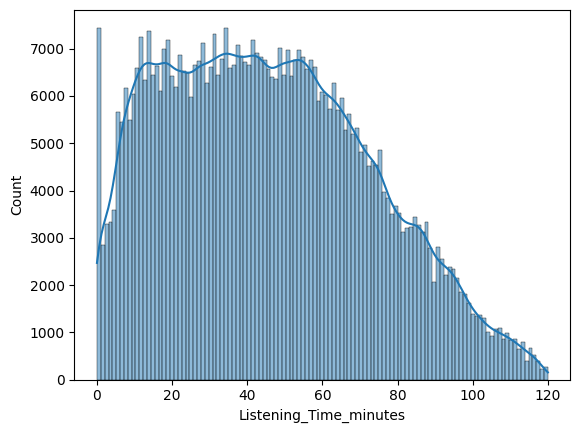

In [36]:
import seaborn as sns
sns.histplot(train['Listening_Time_minutes'], kde=True)

<Axes: xlabel='Genre'>

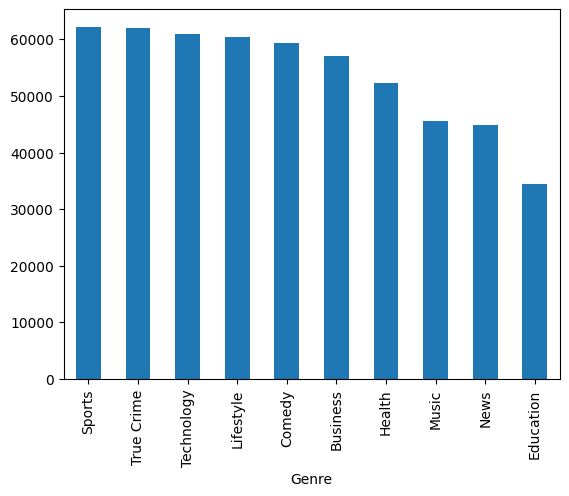

In [37]:
train['Genre'].value_counts().plot(kind='bar')


<Axes: xlabel='Listening_Time_minutes'>

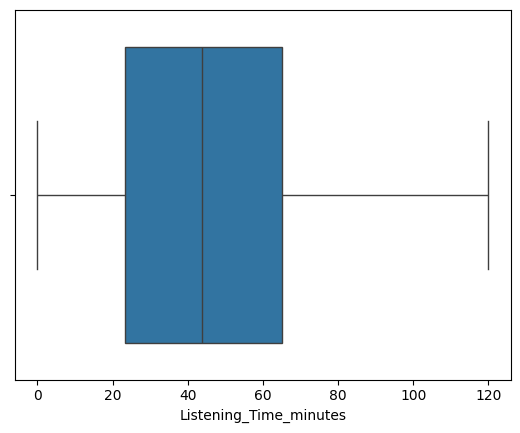

In [40]:
sns.boxplot(x=train['Listening_Time_minutes'])


<Axes: ylabel='Frequency'>

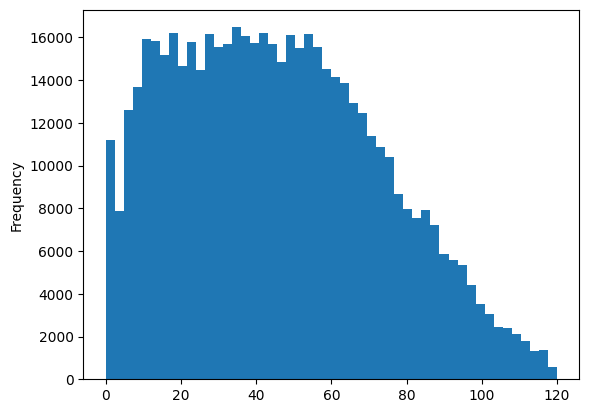

In [41]:
train['Listening_Time_minutes'].plot(kind='hist', bins=50)


#****Preprocessing****

#Splitting the dataset

In [53]:
x = train.drop(columns=['Listening_Time_minutes','id','Episode_Title'])
y = train['Listening_Time_minutes']

In [54]:
x['Podcast_Name'].nunique()

48

In [60]:
x.columns.tolist()

['Podcast_Name',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment']

In [55]:
categorical_variables = x.select_dtypes(include = ['object']).columns.tolist()

In [56]:
categorical_variables

['Podcast_Name',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [57]:
x[['Podcast_Name',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']].nunique()

,0
Podcast_Name,48
Genre,10
Publication_Day,7
Publication_Time,4
Episode_Sentiment,3


# Encoding categorical variables

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in categorical_variables:
  x[i] = encoder.fit_transform(x[i])

In [66]:
x.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
1,24,119.80,1,66.95,2,0,75.95,2.0,0
2,40,73.90,2,69.97,5,1,8.97,0.0,0
3,10,67.17,8,57.22,1,2,78.70,2.0,2
4,31,110.51,3,80.07,1,0,58.68,3.0,1
6,6,69.83,9,35.82,3,3,39.02,0.0,1


# Applying Standardizatiom

In [67]:
from sklearn.preprocessing import StandardScaler

cols_to_standardize = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]

scaler = StandardScaler()
train[cols_to_standardize] = scaler.fit_transform(train[cols_to_standardize])


In [69]:
x.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
1,24,119.80,1,66.95,2,0,75.95,2.0,0
2,40,73.90,2,69.97,5,1,8.97,0.0,0
3,10,67.17,8,57.22,1,2,78.70,2.0,2
4,31,110.51,3,80.07,1,0,58.68,3.0,1
6,6,69.83,9,35.82,3,3,39.02,0.0,1


In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
test = pd.read_csv('test.csv')

#Evaluation

In [75]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Validation RMSE:", rmse)

Validation RMSE: 10.03163807891724


In [77]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

7.522362175266054

In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8636925153754124

In [86]:
test_for_prediction = test.copy()

for column in test_for_prediction.select_dtypes(include=np.number).columns:
    test_for_prediction[column].fillna(test_for_prediction[column].mean(), inplace=True)
for column in test_for_prediction.select_dtypes(include=['object']).columns:
    test_for_prediction[column].fillna(test_for_prediction[column].mode()[0], inplace=True)


for i in categorical_variables:
    all_unique_values = list(set(x[i].unique()) | set(test_for_prediction[i].unique()))

    encoder.fit(all_unique_values)

    x[i] = encoder.transform(x[i])
    test_for_prediction[i] = encoder.transform(test_for_prediction[i])


test_for_prediction[cols_to_standardize] = scaler.transform(test_for_prediction[cols_to_standardize])

y_pred = model.predict(test_for_prediction[x.columns])


output = pd.DataFrame({
    'id': test['id'],
    'Listening_Time_minutes': y_pred
})

output.to_csv('predictions_output.csv', index=False)

<ipython-input-86-6e3db4806e0d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_for_prediction[column].fillna(test_for_prediction[column].mean(), inplace=True)
<ipython-input-86-6e3db4806e0d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me